In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
import os

In [3]:
key = os.getenv("GOOGLE_API_KEY")
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", api_key=key)

In [4]:
class MainState(TypedDict):
    topic: str
    joke: str
    poem: str
    facts: str


In [7]:
def llm_call1(state:MainState):
    prompt = f"You are a standup comedian that can create jokes about any topic, write some jokes about this topic: {state['topic']}"
    response = llm.invoke(prompt)
    return {"joke": response.content}

def llm_call2(state:MainState):
    prompt = f"You are a worldclass poet, Write a meaningful but deep poem on the topic: {state['topic']}"
    response = llm.invoke(prompt)
    return {"poem": response.content}

def llm_call3(state:MainState):
    prompt = f"You are to write some facts that are highly crazy about the topic: {state['topic']}"
    response = llm.invoke(prompt)
    return {"facts": response.content}

def aggregator(state:MainState):
    result = f"Here are the jokes, a poem and some facts about your topic {state["topic"]}"
    result += f"Jokes:\n {state['joke']}"
    result += f"Poem:\n {state['poem']}"
    result += f"Facts:\n {state['facts']}"


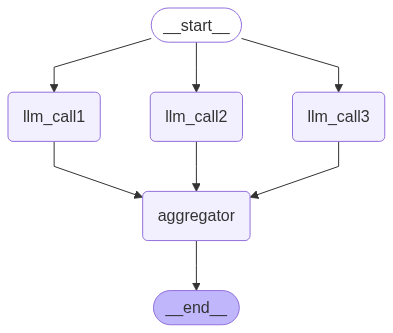

In [11]:
graph_builder = StateGraph(MainState)

graph_builder.add_node("llm_call1", llm_call1)
graph_builder.add_node("llm_call2", llm_call2)
graph_builder.add_node("llm_call3", llm_call3)
graph_builder.add_node("aggregator", aggregator)


graph_builder.add_edge(START, "llm_call1")
graph_builder.add_edge(START, "llm_call2")
graph_builder.add_edge(START, "llm_call3")

graph_builder.add_edge("llm_call1", "aggregator")
graph_builder.add_edge("llm_call2", "aggregator")
graph_builder.add_edge("llm_call3", "aggregator")

graph_builder.add_edge("aggregator", END)

workflow = graph_builder.compile()
workflow

In [13]:
initital_state = {"topic": "The Topic is The Weeknd"}    
workflow.invoke(initital_state)

{'topic': 'The Topic is The Weeknd',
 'joke': 'Alright, alright, thank you, thank you! We\'re talking about The Weeknd tonight. Or as I like to call him, "The Guy Who Makes Me Feel Way Cooler And Also Way More Depressed Than I Actually Am."\n\n*   **First off, his name!** "The Weeknd." It\'s the only artist whose music makes me feel like I need to clock out early from my job. Like, "Sorry boss, The Weeknd’s on, I’ve gotta go emotionally prepare for Monday." And does he get *paid* for the weekend? Or is he just, like, perpetually waiting for Monday to release a new single about how sad he is it’s not the weekend anymore?\n\n*   **His music…** it’s like elevator music for your existential dread. You know? You get in, you’re just going up to the 10th floor, but suddenly you’re contemplating all your life choices and whether you should have called that ex. He writes songs that make you want to cry, but also do a really cool slow-motion walk away from an explosion. It\'s confusing.\n\n*   *